<h1 class="alert alert-success">Algorithmique autour des graphes</h1>

<h2 class="alert alert-info">1. Préliminaires</h2>

Nous avons vu dans le TP précédent une première version de classe Graphe que nous allons exploiter pour effectuer des algorithmes de parcours en largeur ou en profondeur et rechercher des cycles.
Nous commençons donc ici par re-écrire cette classe et ajouter quelques fonctionnalités complémentaires comme dans le TP précédent (fonction de vicualisation et fonction pour créer un Graphe à partir de sa matrice d'adjacence).

<h3 class="alert alert-warning">Écriture de la classe Graphe</h3>

In [1]:
class Graphe():  # graphe représenté par un Dictionaire d'Adjacence
    """ Graphe implémenté à l'aide d'un dictionnaire d'adjacence.
    Exemple : 
    self.dico = {'sommet_x': {'sommet_y' : poids_xy, 'sommet_z' : poids_xz},  etc...}
    Chaque sommet est identifié par son étiquette (qui doit être unique !).
    """
    def __init__(self):
        """ Initialisation avec un graphe vide. """
        self.dico = dict()
    
    def ajouter_sommet(self, sommet):
        """ Ajoute un nouveau sommet au graphe. """
        if not sommet in self.dico:
            self.dico[sommet] = dict()
    
    def ajouter_arete(self, sommet1, sommet2, poids=1):
        """ Ajoute une arête au graphe de sommet1 vers sommet2.
        Si poids n'est pas renseigné, il prendra la valeur 1 par défaut. """
        # Si les sommets n'existent pas, on les crée avant l'arête :
        self.ajouter_sommet(sommet1)
        self.ajouter_sommet(sommet2)
            # On crée la connexion sommet1 -> sommet2 (arc orienté par défaut)
        self.dico[sommet1][sommet2] = poids
    
    def sommets(self):
        """ Renvoie la liste des sommets triée par étiquette. """
        return sorted(list(self.dico.keys()))
    
    def successeurs(self, sommet):
        """ Renvoie la liste des successeurs de sommet, triée par étiquette. """
        return sorted(list(self.dico[sommet].keys()))
    
    def poids(self, sommet1, sommet2):
        """ Renvoie le poids de l'arête sommet1->sommet2 ou 0 si pas d'arête. """
        if sommet2 not in self.dico[sommet1]:
            return 0
        else:
            return self.dico[sommet1][sommet2]
            
    def get_graphe(self):
        """ Renvoie le dictionnaire d'adjacence représentant le graphe. """
        return self.dico
    def set_graphe(self, dico):
        """ Définit le dictionnaire d'adjacence représentant le graphe. """
        self.dico = dico

<h3 class="alert alert-warning">Import d'une fonction de visualisation.</h3>

**Rappel** : il peut être intéressant de tester les moteurs de rendu graphique **dot**, **circo** et **neato** en fonction du graphe qu'on veut visualiser.

In [2]:
from graphe_dot import dessiner

<h3 class="alert alert-warning">Conversion d'une matrice d'adjacence en un dictionnaire d'adjacence (avec la liste des étiquettes).</h3>

In [3]:
def mat2dico(matrice, etiquettes=None):
    """ Crée un dico d'adjacence à partir d'une matrice d'adjacence :
     - etiquettes est la liste des étiquettes des sommets 
    """
    n = len(matrice)
    if etiquettes is None: # si aucune étiquette de sommets communiquée :
        etiquettes = [i for i in range(n)] # on crée des sommets étiquettés de 0 à n-1
    assert len(etiquettes) == len(set(etiquettes)), "Erreur : doublon d'identifiants de sommets"
    dico = dict() 
    for i in range(n):
        dico[etiquettes[i]] = dict()
        for j in range(n):
            if matrice[i][j] != 0:  # 2 sommets non connectés sont séparés d'une distance nulle
                dico[etiquettes[i]][etiquettes[j]] = matrice[i][j]
    return dico

<h2 class="alert alert-info">2. Parcours en profondeur</h2>

Maintenant que tout est en place avec une classe Graphe aboutie, nous allons créer une fonction `parcours_profondeur(graphe, depart)`, qui prend en paramètres :
- le graphe à parcourir
- le sommet de départ pour le parcours

Celle-ci est déjà un peu ébauchée, vous devrez compléter le coeur de l'algorithme **récursif** dans la fonction dfs.

<h3 class="alert alert-warning">Fonction de parcours en profondeur.</h3>

**Compléter la fonction ci-dessous :**

In [4]:
def parcours_profondeur(graphe, depart):
    """ Parcourt l'arbre en profondeur (DFS) """
    def dfs(graphe, sommet):
        # A VOUS DE JOUER
        # ...
        traités.append(sommet)
        for successeur in graphe.successeurs(sommet):
            if successeur not in traités:
                dfs(graphe, successeur)
        # ...
    traités = []  # sommets déjà traités
    dfs(graphe, depart)
    return traités

<h3 class="alert alert-warning">Test</h3>

On donne ci-dessous la matrice d'adjacence du graphe vu en cours. Les étiquettes sont tout simplement les lettres de A à H dans l'ordre alphabétique.

Exploiter les fonctionnalités mises en place pour obtenir une instance nommée `g1` de la classe Graphe correspondant à ce graphe. 

In [5]:
matrice = [[0,1,1,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [1,0,0,1,0,0,0,0],
          [0,1,1,0,1,0,0,0],
          [0,1,0,1,0,1,1,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,1],
          [0,0,0,0,0,0,1,0]]

In [6]:
# à vous de jouer
# ...

sommets = 'ABCDEFGH'

g1 = Graphe()
dico = mat2dico(matrice, sommets)
g1.set_graphe(dico)

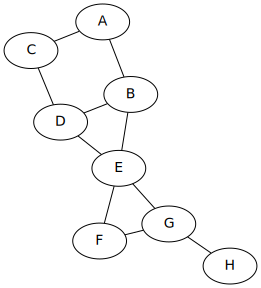

In [7]:
# si vous avez bien travaillé, cette cellule doit vous permettre de visualiser le graphe du cours.
dessiner(g1, 'neato')

On peut maintenant vérifier que la fonction de parcours en profondeur fonctionne correctement :

In [8]:
# Tests : 
for s in g1.sommets():
    print(f"sommet de départ {s} :")
    print(parcours_profondeur(g1, s))

sommet de départ A :
['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']
sommet de départ B :
['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']
sommet de départ C :
['C', 'A', 'B', 'D', 'E', 'F', 'G', 'H']
sommet de départ D :
['D', 'B', 'A', 'C', 'E', 'F', 'G', 'H']
sommet de départ E :
['E', 'B', 'A', 'C', 'D', 'F', 'G', 'H']
sommet de départ F :
['F', 'E', 'B', 'A', 'C', 'D', 'G', 'H']
sommet de départ G :
['G', 'E', 'B', 'A', 'C', 'D', 'F', 'H']
sommet de départ H :
['H', 'G', 'E', 'B', 'A', 'C', 'D', 'F']


<h2 class="alert alert-info">3. Parcours en largeur</h2>

Vous allez maintenant créer une fonction `parcours_largeur(graphe, depart)`. De la même manière, elle va permettre de parcourir l'ensemble des sommets du graphe à partir d'un sommet. Mais bien entendu, le parcours se fait en largeur d'abord.

On rappelle que pour un parcours en largeur, plutôt que d'utiliser la récursivité, on préfère faire appel à une file (voir cours).

In [9]:
def parcours_largeur(graphe, depart):
    """ Parcourt l'arbre en largeur (BFS) """
    # A VOUS DE JOUER
    # ...
    decouverts = [depart]  # sommets déjà decouverts
    file = [depart]
    while file:    # tant que la file n'est pas vide
        sommet = file.pop(0)
        for successeur in graphe.successeurs(sommet):
            if successeur not in decouverts:
                file.append(successeur)
                decouverts.append(successeur)
    return decouverts  

In [10]:
# Tests 
for s in g1.sommets():
    print(parcours_largeur(g1, s))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
['B', 'A', 'D', 'E', 'C', 'F', 'G', 'H']
['C', 'A', 'D', 'B', 'E', 'F', 'G', 'H']
['D', 'B', 'C', 'E', 'A', 'F', 'G', 'H']
['E', 'B', 'D', 'F', 'G', 'A', 'C', 'H']
['F', 'E', 'G', 'B', 'D', 'H', 'A', 'C']
['G', 'E', 'F', 'H', 'B', 'D', 'A', 'C']
['H', 'G', 'E', 'F', 'B', 'D', 'A', 'C']


<h2 class="alert alert-info">4. Chercher les cycles</h2>

Écrire une fonction `cycle` qui prend en paramètres un graphe et qui renvoie un booléen selon que le graphe contient un cycle ou non.

Cette fonction repose sur un parcours en largeur légèrement modifié :

    - Le sommet de départ est aléatoire
    - Un cycle est détecté si le parcours "repasse" par un sommet déjà visité !

In [11]:
from random import choice   # import de fonction pour choisir un élément de liste au hasard
help(choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [12]:
def cycle(graphe):
    """ Renvoie True (resp. False) si le graphe contient (resp. ne contient pas) un cycle :
    Parcourt le graphe en largeur depuis un sommet quelconque et cherche si on retombe sur le sommet de départ """
    # à vous de jouer
    # ...
    depart = choice(graphe.sommets())
    traités = []
    file = [depart]
    while file:    # tant que la file n'est pas vide
        sommet = file.pop(0)
        if sommet in traités:
            return True
        else:
            traités.append(sommet)
            for successeur in graphe.successeurs(sommet):
                if successeur not in traités:
                    file.append(successeur)
    return False

In [13]:
# on vérifie que le graphe g1 contient bien un cycle :
assert cycle(g1)

<h3 class="alert alert-warning">Test sans cycle</h3>

Voici à nouveau la matrice d'adjacence du graphe du cours. Supprimer sur cette matrice 3 arêtes pour obtenir un graphe sans cycle.

In [14]:
matrice = [[0,1,1,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [1,0,0,1,0,0,0,0],
          [0,1,1,0,1,0,0,0],
          [0,1,0,1,0,1,1,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,1],
          [0,0,0,0,0,0,1,0]]

# Construction d'un graphe sans cycle :
matrice_sans_cycle = [[0,1,1,0,0,0,0,0],
          [1,0,0,0,1,0,0,0],
          [1,0,0,0,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,1,0,1,0,1,1,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,1,0,0,1],
          [0,0,0,0,0,0,1,0]]

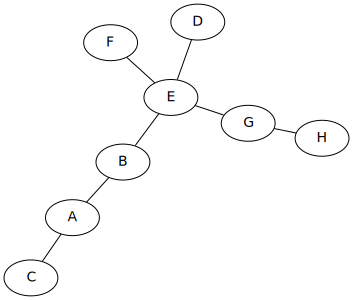

In [15]:
g2 = Graphe()
g2.set_graphe(mat2dico(matrice_sans_cycle, sommets))
dessiner(g2, 'neato')

In [16]:
# on vérifie que ce nouveau graphe ne contient pas de cycle :
assert not cycle(g2) # bien noter le NOT dans ce test !!

*Remarque* : cet algo de détection de cycle fonctionne pour les graphes non orientés.

Dans le cas d'un graphe orienté, il faut utiliser un algorithme un peu plus compliqué.

<h3 class="alert alert-warning">Complément : Parcours en profondeur en version itérative</h3>

En complément, nous proposons de revenir sur le parcours en profondeur pour en écrire une version itérative.

**Il suffit tout simplement de reprendre l'algorithme du parcours en largeur en remplaçant la file par une pile !**

A vous de jouer ...

In [17]:
def parcours_profondeur_iter(graphe, depart):
    """ Parcourt l'arbre en profondeur (DFS) version itérative avec une pile """
    # A VOUS DE JOUER
    # ...
    decouverts = [depart]  # sommets déjà decouverts
    pile = [depart]
    while pile:    # tant que la pile n'est pas vide
        sommet = pile.pop()
        for successeur in graphe.successeurs(sommet):
            if successeur not in decouverts:
                pile.append(successeur)
                decouverts.append(successeur)
    return decouverts  

['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']
['B', 'A', 'D', 'E', 'F', 'G', 'H', 'C']

['C', 'A', 'B', 'D', 'E', 'F', 'G', 'H']
['C', 'A', 'D', 'B', 'E', 'F', 'G', 'H']

['D', 'B', 'A', 'C', 'E', 'F', 'G', 'H']
['D', 'B', 'C', 'E', 'F', 'G', 'H', 'A']

['E', 'B', 'A', 'C', 'D', 'F', 'G', 'H']
['E', 'B', 'D', 'F', 'G', 'H', 'C', 'A']

['F', 'E', 'B', 'A', 'C', 'D', 'G', 'H']
['F', 'E', 'G', 'H', 'B', 'D', 'C', 'A']

['G', 'E', 'B', 'A', 'C', 'D', 'F', 'H']
['G', 'E', 'F', 'H', 'B', 'D', 'C', 'A']

['H', 'G', 'E', 'B', 'A', 'C', 'D', 'F']
['H', 'G', 'E', 'F', 'B', 'D', 'C', 'A']



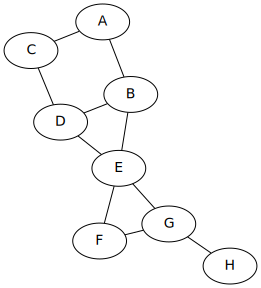

In [18]:
# Test 
# On pourra chercher à expliquer pourquoi les parcours en profondeur itératif ou récursif 
# présentent des différences.
# Rassurons-nous toutefois, les 2 versions parcourent l'intégralité des sommets du graphe.
for s in g1.sommets():
    print(parcours_profondeur(g1, s))
    print(parcours_profondeur_iter(g1, s))
    print()
    
dessiner(g1, 'neato')

<h2 class="alert alert-info">5. Chemins entre deux sommets</h2>

Pour finir, on veut écrire une fonction qui trouve un chemin entre deux sommets (si possible...).

On décide pour cela d'écrire une fonction qui parcourt le graphe à partir d'un sommet (parcours en largeur par exemple), et qui relève au cours du parcours l'ensemble des chemins suivis depuis ce sommet initial. Ces chemins sont stockés dans un dictionnaire, dont les clefs sont les sommets atteints et les valeurs les listes des sommets à parcourir depuis le départ.

**Compléter seulement la ligne manquante de la fonction ci-dessous :**

In [19]:
def chemins(graphe, depart):
    """ Repose sur un parcourt l'arbre en largeur (BFS) """
    decouverts = [depart]  # sommets déjà decouverts
    file = [depart]
    trajets = {depart:[depart]}
    while file:    # tant que la file n'est pas vide
        sommet = file.pop(0)
        for successeur in graphe.successeurs(sommet):
            if successeur not in decouverts:
                file.append(successeur)
                decouverts.append(successeur)
                ### COMPLETER LA LIGNE SUIVANTE :
                # trajets[successeur] = ...
                trajets[successeur] = trajets[sommet] + [successeur]
    return trajets  

<h3 class="alert alert-warning">Test</h3>

Pour rendre l'utilisation de cette fonction plus intéressante, nous avons légèrement modifié le graphe du cours en orientant quelques arêtes pour rendre une partie du graphe inaccessible dans un sens :

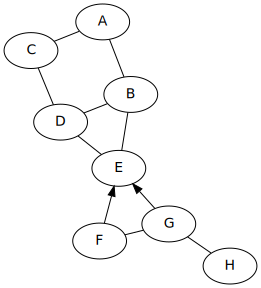

In [20]:
matrice_orientee = [[0,1,1,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [1,0,0,1,0,0,0,0],
          [0,1,1,0,1,0,0,0],
          [0,1,0,1,0,0,0,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,1],
          [0,0,0,0,0,0,1,0]]

sommets = 'ABCDEFGH'
g3 = Graphe()
g3.set_graphe(mat2dico(matrice_orientee, sommets))
dessiner(g3, 'neato')

In [21]:
print("Sommets accessibles depuis H : ")
trajets = chemins(g3, "H")
for sommet in g3.sommets():
    if sommet in trajets:
        print(f"Chemin vers sommet {sommet} : {trajets[sommet]}")
    
print("\nSommets accessibles depuis A : ")
trajets = chemins(g3, "A")
for sommet in g3.sommets():
    if sommet in trajets:
        print(f"Chemin vers sommet {sommet} : {trajets[sommet]}")
          
print("\nSommets accessibles depuis G : ")
trajets = chemins(g3, "G")
for sommet in g3.sommets():
    if sommet in trajets:
        print(f"Chemin vers sommet {sommet} : {trajets[sommet]}")

Sommets accessibles depuis H : 
Chemin vers sommet A : ['H', 'G', 'E', 'B', 'A']
Chemin vers sommet B : ['H', 'G', 'E', 'B']
Chemin vers sommet C : ['H', 'G', 'E', 'D', 'C']
Chemin vers sommet D : ['H', 'G', 'E', 'D']
Chemin vers sommet E : ['H', 'G', 'E']
Chemin vers sommet F : ['H', 'G', 'F']
Chemin vers sommet G : ['H', 'G']
Chemin vers sommet H : ['H']

Sommets accessibles depuis A : 
Chemin vers sommet A : ['A']
Chemin vers sommet B : ['A', 'B']
Chemin vers sommet C : ['A', 'C']
Chemin vers sommet D : ['A', 'B', 'D']
Chemin vers sommet E : ['A', 'B', 'E']

Sommets accessibles depuis G : 
Chemin vers sommet A : ['G', 'E', 'B', 'A']
Chemin vers sommet B : ['G', 'E', 'B']
Chemin vers sommet C : ['G', 'E', 'D', 'C']
Chemin vers sommet D : ['G', 'E', 'D']
Chemin vers sommet E : ['G', 'E']
Chemin vers sommet F : ['G', 'F']
Chemin vers sommet G : ['G']
Chemin vers sommet H : ['G', 'H']


<h3 class="alert alert-warning">Fonction existe_chemin</h3>

Connaissant l'ensemble des chemins vers tous les sommets accessibles, il est maintenant aisé d'écrire la fonction `existe_chemin(graphe, depart, arrivee)` qui renvoie True si un chemin entre le départ et l'arrivée existe (False dans le cas contraire). 

Au passage, on peut faire en sorte que cette fonction affiche un chemin, mais cela a peu d'intérêt car ce chemin n'a a priori rien de particulier : il n'est pas forcément le plus court par exemple.

In [22]:
def existe_chemin(graphe, depart, arrivee):
    """ Renvoie True si un chemin est possible entre depart et arrivee """
    # à vous de joeur
    # ...
    trajets = chemins(graphe, depart)
    if arrivee in trajets.keys():
        print(trajets[arrivee]) # facultatif
        return True
    else:
        return False

In [23]:
print(existe_chemin(g3, "A", "E"))
print(existe_chemin(g3, "E", "A"))
print(existe_chemin(g3, "H", "A"))
print(existe_chemin(g3, "A", "H"))

['A', 'B', 'E']
True
['E', 'B', 'A']
True
['H', 'G', 'E', 'B', 'A']
True
False


**Remarque :** On s'est contenté ici de chercher l'existence d'UN chemin quelconque, mais pas le plus court chemin... Un algorithme développé par E. Dijkstra en 1959 permet de trouver le plus court chemin entre deux sommets d'un graphe. Il est utilisé quotidiennement dans vos applications de trajets GPS.

<h2 class="alert alert-info">6. Ajout des fonctions à la classe Graphe</h2>

## Dernière étape :
Réécrire la classe Graphe en implémentant les fonctions que nous venons de voir sous formes de nouvelles méthodes pour :
- faire un parcours en largeur (avec file) : renvoie la liste des sommets parcourus.
- faire un parcours en pronfondeur (récursif) : renvoie la liste des sommets parcourus.
- détecter la présence d'un cycle : renvoie un booléen.
- détecter la possibilité d'un chemin entre un sommet1 et un sommet2 : renvoie un booléen.

Puis sauvegarder cette classe dans un fichier classe_graphe.py (pour une exploitation possible ultérieure)

In [24]:
class Graphe():  # graphe représenté par un Dictionaire d'Adjacence
    """ Graphe implémenté à l'aide d'un dictionnaire d'adjacence.
    Exemple : 
    self.dico = {'sommet_x': {'sommet_y' : poids_xy, 'sommet_z' : poids_xz},  etc...}
    Chaque sommet est identifié par son étiquette (qui doit être unique !).
    """
    def __init__(self):
        """ Initialisation avec un graphe vide. """
        self.dico = dict()
    
    def ajouter_sommet(self, sommet):
        """ Ajoute un nouveau sommet au graphe. """
        if not sommet in self.dico:
            self.dico[sommet] = dict()
    
    def ajouter_arete(self, sommet1, sommet2, poids=1):
        """ Ajoute une arête au graphe de sommet1 vers sommet2.
        Si poids n'est pas renseigné, il prendra la valeur 1 par défaut. """
        # Si les sommets n'existent pas, on les crée avant l'arête :
        self.ajouter_sommet(sommet1)
        self.ajouter_sommet(sommet2)
            # On crée la connexion sommet1 -> sommet2 (arc orienté par défaut)
        self.dico[sommet1][sommet2] = poids
    
    def sommets(self):
        """ Renvoie la liste des sommets triée par étiquette. """
        return sorted(list(self.dico.keys()))
    
    def successeurs(self, sommet):
        """ Renvoie la liste des successeurs de sommet, triée par étiquette. """
        return sorted(list(self.dico[sommet].keys()))
    
    def poids(self, sommet1, sommet2):
        """ Renvoie le poids de l'arête sommet1->sommet2 ou 0 si pas d'arête. """
        if sommet2 not in self.dico[sommet1]:
            return 0
        else:
            return self.dico[sommet1][sommet2]
            
    def get_graphe(self):
        """ Renvoie le dictionnaire d'adjacence représentant le graphe. """
        return self.dico
    def set_graphe(self, dico):
        """ Définit le dictionnaire d'adjacence représentant le graphe. """
        self.dico = dico
    
    def parcours_profondeur(self, depart):
        """ Parcourt l'arbre en profondeur (DFS) """
        def dfs(sommet):
            traités.append(sommet)
            for successeur in self.successeurs(sommet):
                if successeur not in traités:
                    dfs(successeur)
        traités = []  # sommets déjà traités
        dfs(depart)
        return traités

    def parcours_largeur(self, depart):
        """ Parcourt l'arbre en largeur (BFS) """
        decouverts = [depart]  # sommets déjà decouverts
        file = [depart]
        while file:    # tant que la file n'est pas vide
            sommet = file.pop(0)
            for successeur in self.successeurs(sommet):
                if successeur not in decouverts:
                    file.append(successeur)
                    decouverts.append(successeur)
        return decouverts 
    
    def cycle(self):
        """ Renvoie True (resp. False) si le graphe contient (resp. ne contient pas) un cycle :
        Parcourt le graphe en largeur depuis un sommet quelconque et cherche si on retombe sur le sommet de départ """
        depart = choice(self.sommets())
        traités = []
        file = [depart]
        while file:    # tant que la file n'est pas vide
            sommet = file.pop(0)
            if sommet in traités:
                return True # on peut quitter la fonction : cycle trouvé !
            else:
                traités.append(sommet)
                for successeur in self.successeurs(sommet):
                    if successeur not in traités:
                        file.append(successeur)
        return False  # aucun cycle n'a été détecté
    
    def existe_chemin(self, depart, arrivee):
        """ Renvoie True si un chemin existe entre depart et arrivee,
        et donne un exemple de chemin possible (pas forcémetn unique) """
        def chemins(graphe, depart):
            """ Repose sur un parcourt l'arbre en largeur (BFS) """
            decouverts = [depart]  # sommets déjà visités
            file = [depart]
            trajets = {depart:[depart]}
            while file:    # tant que la pile n'est pas vide
                sommet = file.pop(0)
                for successeur in graphe.successeurs(sommet):
                    if successeur not in decouverts:
                        file.append(successeur)
                        decouverts.append(successeur)
                        trajets[successeur] = trajets[sommet] + [successeur]
            return trajets
        
        trajets = chemins(self, depart)
        if arrivee in trajets.keys():
            #print(trajets[arrivee]) # facultatif évidemment
            return True
        else:
            return False

On définit pour finir un graphe orienté, non connexe (càd que tous les sommets ne sont pas reliés entre eux).

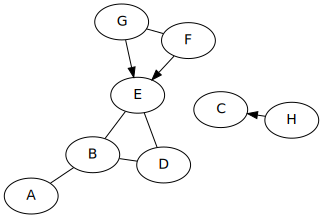

In [25]:
matrice_non_connexe = [[0,1,0,0,0,0,0,0],
          [1,0,0,1,1,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,1,0,0,1,0,0,0],
          [0,1,0,1,0,0,0,0],
          [0,0,0,0,1,0,1,0],
          [0,0,0,0,1,1,0,0],
          [0,0,1,0,0,0,0,0]]

sommets = 'ABCDEFGH'
g = Graphe()
g.set_graphe(mat2dico(matrice_non_connexe, sommets))
dessiner(g, 'neato')

In [26]:
g.cycle()

True

In [27]:
for s in g.sommets():
    print(g.parcours_largeur(s))

['A', 'B', 'D', 'E']
['B', 'A', 'D', 'E']
['C']
['D', 'B', 'E', 'A']
['E', 'B', 'D', 'A']
['F', 'E', 'G', 'B', 'D', 'A']
['G', 'E', 'F', 'B', 'D', 'A']
['H', 'C']


In [28]:
for s in g.sommets():
    print(g.parcours_profondeur(s))

['A', 'B', 'D', 'E']
['B', 'A', 'D', 'E']
['C']
['D', 'B', 'A', 'E']
['E', 'B', 'A', 'D']
['F', 'E', 'B', 'A', 'D', 'G']
['G', 'E', 'B', 'A', 'D', 'F']
['H', 'C']


In [29]:
for i in range(len(g.sommets())):
    s1 = g.sommets()[i]
    for j in range(i+1, len(g.sommets())):
        s2 = g.sommets()[j]
        if g.existe_chemin(s1, s2) == g.existe_chemin(s2, s1) == True:
            print(f"Chemin réversible entre {s1} et {s2}")
        elif  g.existe_chemin(s1, s2):
            print(f"Chemin ORIENTÉ de {s1} vers {s2}")
        elif  g.existe_chemin(s2, s1):
            print(f"Chemin ORIENTÉ de {s2} vers {s1}")
        else:
            print(f"PAS de Chemin entre {s1} et {s2}")

Chemin réversible entre A et B
PAS de Chemin entre A et C
Chemin réversible entre A et D
Chemin réversible entre A et E
Chemin ORIENTÉ de F vers A
Chemin ORIENTÉ de G vers A
PAS de Chemin entre A et H
PAS de Chemin entre B et C
Chemin réversible entre B et D
Chemin réversible entre B et E
Chemin ORIENTÉ de F vers B
Chemin ORIENTÉ de G vers B
PAS de Chemin entre B et H
PAS de Chemin entre C et D
PAS de Chemin entre C et E
PAS de Chemin entre C et F
PAS de Chemin entre C et G
Chemin ORIENTÉ de H vers C
Chemin réversible entre D et E
Chemin ORIENTÉ de F vers D
Chemin ORIENTÉ de G vers D
PAS de Chemin entre D et H
Chemin ORIENTÉ de F vers E
Chemin ORIENTÉ de G vers E
PAS de Chemin entre E et H
Chemin réversible entre F et G
PAS de Chemin entre F et H
PAS de Chemin entre G et H
